In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [2]:
cal_vanilla = pyuvdata.UVCal()
cal_vanilla.read_calfits('/Users/ruby/Astro/dwcal_tests_Feb2022/vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
cal_dw.read_calfits('/Users/ruby/Astro/dwcal_tests_Feb2022/wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


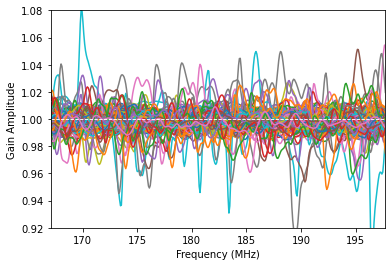

In [3]:
for ant_ind in range(cal_vanilla.Nants_data):
    plt.plot(np.squeeze(cal_vanilla.freq_array)/1e6, np.abs(cal_vanilla.gain_array[ant_ind,0,:,0,0]))
    plt.xlim([np.min(cal_vanilla.freq_array)/1e6, np.max(cal_vanilla.freq_array)/1e6])
    plt.ylim([1-.08,1+.08])
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Gain Amplitude')
plt.plot([np.min(cal_vanilla.freq_array)/1e6, np.max(cal_vanilla.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
plt.show()

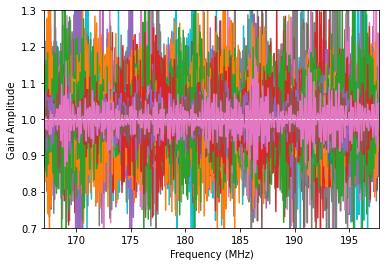

In [6]:
for ant_ind in range(cal_dw.Nants_data):
    plt.plot(np.squeeze(cal_dw.freq_array)/1e6, np.abs(cal_dw.gain_array[ant_ind,0,:,0,0]))
    plt.xlim([np.min(cal_dw.freq_array)/1e6, np.max(cal_dw.freq_array)/1e6])
    plt.ylim([1-.3,1+.3])
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Gain Amplitude')
plt.plot([np.min(cal_dw.freq_array)/1e6, np.max(cal_dw.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
plt.show()

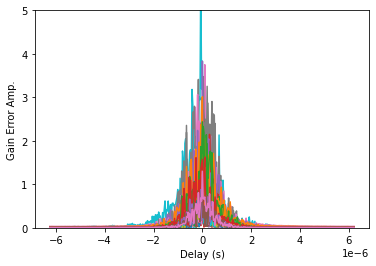

In [7]:
delay_array = np.fft.fftfreq(cal_vanilla.Nfreqs, d=cal_vanilla.channel_width)
delay_array = np.fft.fftshift(delay_array)
for ant_ind in range(cal_vanilla.Nants_data):
    gains_fft = np.fft.fftshift(np.fft.fft(cal_vanilla.gain_array[ant_ind,0,:,0,0]-1))
    plt.plot(delay_array, np.abs(gains_fft))
plt.ylim([0,5])
plt.xlabel('Delay (s)')
plt.ylabel('Gain Error Amp.')
plt.show()

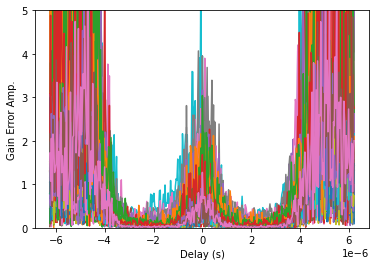

In [9]:
delay_array = np.fft.fftfreq(cal_dw.Nfreqs, d=cal_dw.channel_width)
delay_array = np.fft.fftshift(delay_array)
for ant_ind in range(cal_dw.Nants_data):
    gains_fft = np.fft.fftshift(np.fft.fft(cal_dw.gain_array[ant_ind,0,:,0,0]-1))
    plt.plot(delay_array, np.abs(gains_fft))
plt.ylim([0,5])
plt.xlabel('Delay (s)')
plt.ylabel('Gain Error Amp.')
plt.show()